<div dir="rtl">

#### מגישים:
#### אוריאל כהנא: 209087048
#### האי ידעי: 318369089
#### דניאל טוגנדהפט: 318465291

In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import statsmodels.api as sm
import pickle as pkl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


<div dir="rtl">

# חלק ראשון

In [5]:
data = pkl.load( open('df_task_1_group_28.pkl', 'rb'))
data['intercept']= 1
data.head()

,age,expirience,hour,worker_rank,days_c,toys_c,factories_rand_c,months_c,safety_event,intercept
0,45,0,3,0,Tuesday,toy_cars,Ma’anshan,May,1,1
1,44,1,1,0,Monday,electric_toys,Hefei,November,1,1
2,48,9,10,4,Friday,electric_toys,Anqing,February,0,1
3,46,6,11,3,Tuesday,electric_toys,Hefei,August,0,1
4,43,5,10,2,Tuesday,puzzels,Anqing,December,0,1


<div dir="rtl">

#### 1. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו?

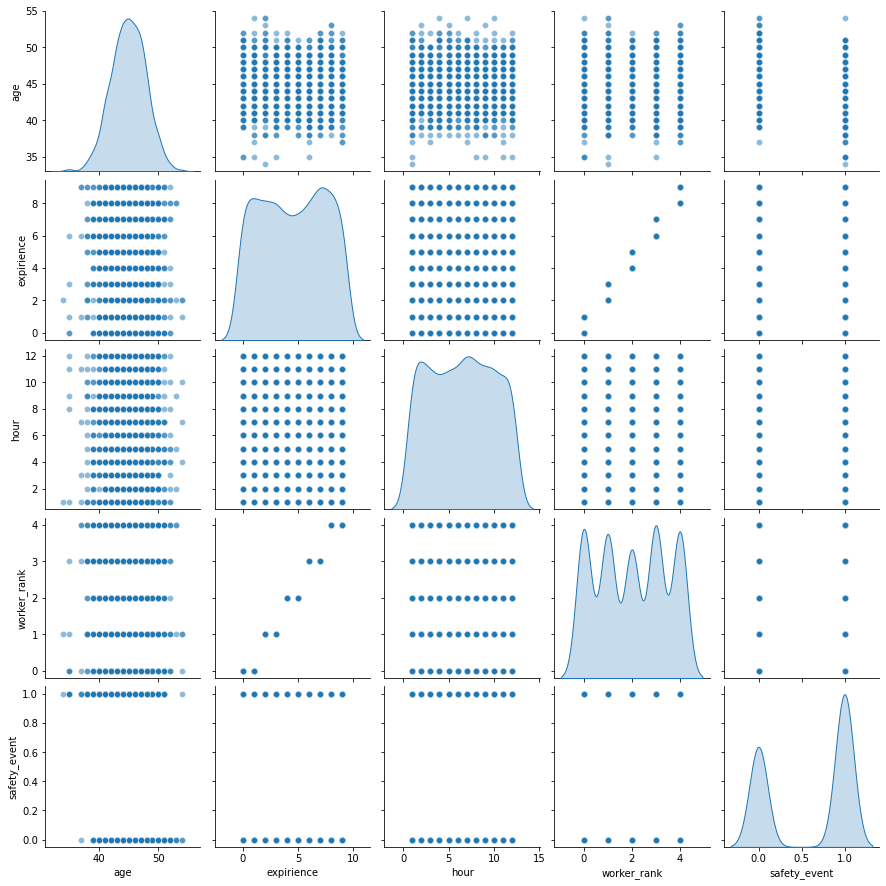

In [7]:
sns.pairplot(data[['age','expirience','hour','worker_rank','safety_event']], markers=["o", "s"], diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()

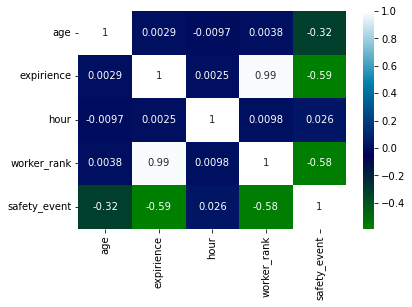

In [8]:
sns.heatmap(data[['age','expirience','hour','worker_rank','safety_event']].corr()  , cmap='ocean',annot = True)
plt.show()

<div dir="rtl">

#### ממפות הפיזור והן מטבלת הקורלציה ניתן ללמוד שהקשר החזק ביותר הוא בין נסיון העובד לדרגה שלו כאשר מקדם המתאם הוא: 0.99 מראה על קשר חיובי חזק!
####  בנוסף יש קשר שלילי חלקי בין אירועי בטיחות וניסיון או דרגת העובד מה שמכוון אותנו להנחה שככל שהעובד חסר ניסיון ודרגה נמוכה יש סכוי גבוה יותר לאירועי בטיחות.

--------------------------------------------------------------------------------------------------------

<div dir="rtl">
   
#### 2. בחרו שני משתנים קטגוריאליים. 
#### הציגו בשני גרפים שונים את מספר העובדים שעברו תאונה לעומת אלו שלא עברו תאונה (בצבעים שונים תאונה לעומת לא תאונה), עבור כל אחת מהקטגוריות בנפרד. 
#### עבור כל אחד מהמשתנים בדקו האם אתם מזהים קטגוריה מסוימת שעבורה יש יותר סיכוי לתאונה בהשוואה לקטגוריות האחרות שבאותו משתנה? 
#### אם כן, מהי אותה קטגוריה בכל אחד מהמשתנים שבחרתם? 
#### בהתחשב בתשובתכם, מה לדעתכם הסבירות שהמקדמים של המשתנים שבחרתם יהיו מובהקים כחלק מרגרסיה לוגיסטית?
    

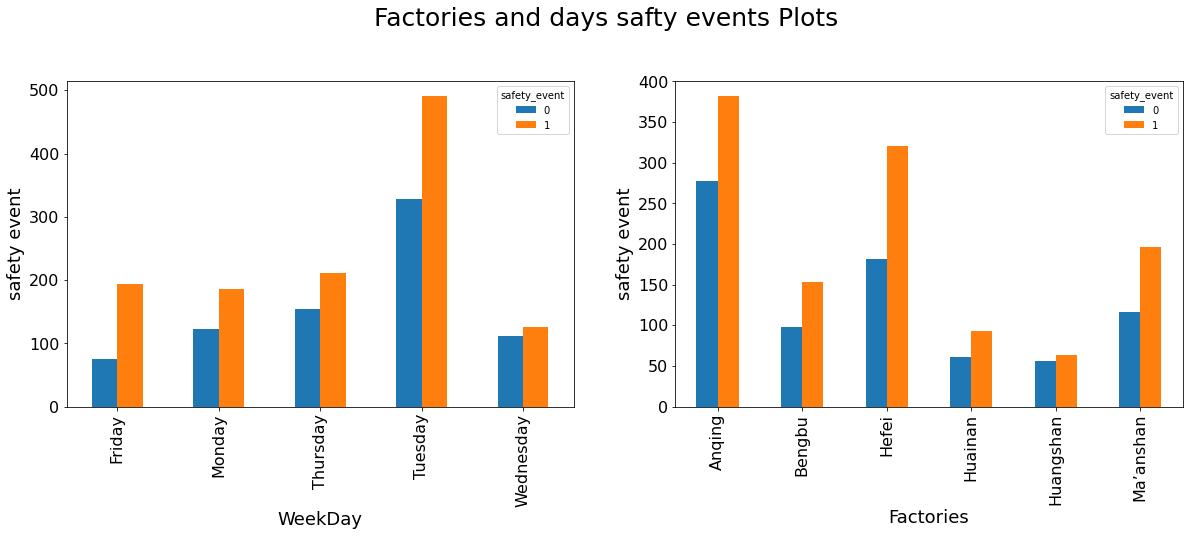

In [12]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))
pd.crosstab(data['days_c'],data['safety_event']).plot(kind='bar',ax=axs[0],fontsize=16)
pd.crosstab(data['factories_rand_c'],data['safety_event']).plot(kind='bar',ax=axs[1],fontsize=16)
plt.suptitle('Factories and days safty events Plots', fontsize=25, x=0.5, y=1.05)
axs[0].set_xlabel('WeekDay',fontsize=18)
axs[1].set_xlabel('Factories',fontsize=18)
axs[0].set_ylabel('safety event',fontsize=18)
axs[1].set_ylabel('safety event',fontsize=18)
plt.show()

In [13]:
dvc = data['days_c'].value_counts()
dvc = pd.DataFrame({'day':dvc.index, 'count':dvc.values})
dv = data[data['safety_event']==1]
dv = dv['days_c'].value_counts()
dv = pd.DataFrame({'day':dv.index, 'safty_events':dv.values})
dvc['safty_events'] = dv['safty_events']
dvc['probability_of_event'] = dvc['safty_events']/dvc['count']
dvc

,day,count,safty_events,probability_of_event
0,Tuesday,820,491,0.598780
1,Thursday,365,211,0.578082
2,Monday,308,194,0.629870
3,Friday,270,186,0.688889
4,Wednesday,237,126,0.531646


<div dir="rtl">

#### עבור WeekDay: ביום שישי הסיכוי לתאונה הכי גבוה ביחס לשאר הימים.  


In [15]:
dvc = data['factories_rand_c'].value_counts()
dvc = pd.DataFrame({'factory':dvc.index, 'count':dvc.values})
dv = data[data['safety_event']==1]
dv = dv['factories_rand_c'].value_counts()
dv = pd.DataFrame({'factory':dv.index, 'safty_events':dv.values})
dvc['safty_events'] = dv['safty_events']
dvc['probability_of_event'] = dvc['safty_events']/dvc['count']
dvc

,factory,count,safty_events,probability_of_event
0,Anqing,660,382,0.578788
1,Hefei,502,320,0.637450
2,Ma’anshan,313,196,0.626198
3,Bengbu,251,153,0.609562
4,Huainan,154,93,0.603896
5,Huangshan,120,64,0.533333


<div dir="rtl">
    
#### עבור Factories: למרות שנראה כי הסיכוי הגבוה ביותר לתאונה הוא במפעל "Anqing" במפעל "Helfei" יש סיכוי הכי גבוה לתאונה משאר המפעלים.

<div dir="rtl">
    
#### בקטגוריה בה הסיכוי לתאונה יותר גבוה יש סבירות יותר גבוהה שהיא תשאר חלק מהמודל

----------------------------------------

<div dir="rtl">

#### 3. הציגו בגרף של שני עמודות את מספר התאונות לעומת לא-תאונות עבור כלל העובדים. חשבו את הסיכוי לתאונה וללא תאונה. האם הנתונים מאוזנים?

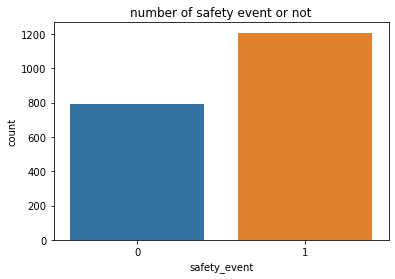

In [20]:
sns.countplot(x=data['safety_event'],data=data)
plt.title('number of safety event or not')
plt.show()

<div dir="rtl">

#### יש יותר סיכוי לאירוע מאשר שלא יקרה, לכן הנתונים לא מאוזנים.

In [22]:
probability_of_safety_event = data['safety_event'].mean()
probability_of_safety_event

0.604

In [23]:
1-probability_of_safety_event

0.396

----------------------------------------

<div dir="rtl">

#### 4. נא להוציא הסטוגרמה של אחד המשתנים הרציפים. יש להסביר במשפט מה הנתונים מה מציגים (טווח, היכן יש ריכוז גבוה

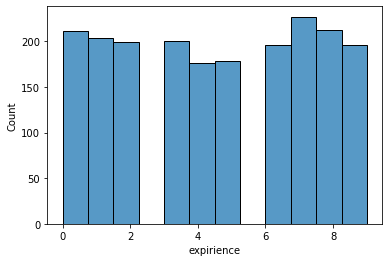

In [26]:
sns.histplot(data=data, x='expirience')
plt.show()

In [27]:
print('the minimum years of expirience is ',data['expirience'].min(),' yaers.')
print('the maximum years of expirience is ',data['expirience'].max(),' yaers.')

the minimum years of expirience is  0  yaers.
the maximum years of expirience is  9  yaers.


<div dir="rtl">

#### טווח הניסיון של העובדים הוא בין שנה ל9 שנים וניתן לחלק את העובדים לשלוש חלקים, 0-2 שנים ניסיון, 3-5 שנות ניסיון ו6-9 שנות ניסיון.-

----------------------------------------

<div dir="rtl">

#### 5. לפני שמתחילים את הניתוח הלוגיסטי - נא לפצל את כל הנתונים לtrain -ו test לפי יחס של 30-70

In [31]:
data.columns

Index(['age', 'expirience', 'hour', 'worker_rank', 'days_c', 'toys_c',
       'factories_rand_c', 'months_c', 'safety_event', 'intercept'],
      dtype='object')

In [32]:
X = data[['age', 'expirience', 'hour', 'worker_rank', 'days_c', 'toys_c',
       'factories_rand_c', 'months_c']]
y = data['safety_event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

----------------------------------------

<div dir="rtl">

#### 6. נא למצוא את משוואת הרגרסיה הלוגיסטית. יש להוציא את כל המשתנים הלא מובהקים ולעשות איטרציות עד אשר מגיעים למשוואה שכולם מובהקים. עבור כל איטרציה שמוצאים משתנים יש לחשב את הAIC ו-BIC. למי יש את הכי נמוך? למה נראה לך שזו התוצאה שהתקבלה.


In [35]:
New_X_train = pd.get_dummies(X_train, drop_first=True, dtype=float)
New_X_train = sm.add_constant(New_X_train)
New_X_train.columns

Index(['const', 'age', 'expirience', 'hour', 'worker_rank', 'days_c_Monday',
       'days_c_Thursday', 'days_c_Tuesday', 'days_c_Wednesday',
       'toys_c_electric_toys', 'toys_c_puzzels', 'toys_c_spinner',
       'toys_c_toy_cars', 'factories_rand_c_Bengbu', 'factories_rand_c_Hefei',
       'factories_rand_c_Huainan', 'factories_rand_c_Huangshan',
       'factories_rand_c_Ma’anshan', 'months_c_August', 'months_c_December',
       'months_c_February', 'months_c_January', 'months_c_July',
       'months_c_June', 'months_c_March', 'months_c_May', 'months_c_November',
       'months_c_October', 'months_c_September'],
      dtype='object')

In [36]:
for_len_New_X_train = New_X_train
before_and_after_aic = []
before_and_after_bic = []

In [37]:
def logistic_regression(X_train, y_train):
    
    model = sm.Logit(y_train,X_train)
    result = model.fit()

    p_values = result.pvalues
    AIC = result.aic
    BIC = result.bic
#בדיקה עבור כל משתנה האם הערך שלו פחות או שווה ל־0.05 .
    
    only_significance = []
    for i in range(len(p_values)):       
        if p_values.values[i] <= 0.05:
            only_significance.append(p_values.keys()[i])
# מחזיר רק את המתשנים המובהקים
    return only_significance,AIC,BIC

In [38]:
A = 1
while A:
    length = len(New_X_train.columns)
    only_significance,aic,bic = logistic_regression(New_X_train, y_train) 
    if len(only_significance) == length:
        A = 0
    New_X_train = New_X_train[only_significance]
    before_and_after_aic.append(aic)
    before_and_after_bic.append(bic)
    

Optimization terminated successfully.
         Current function value: 0.377919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387417
         Iterations 7


In [39]:
print ("lst aic: ",before_and_after_aic)
print ("lst bic: ",before_and_after_bic)

lst aic:  [1.1161735429235732e+03, 1102.7666784293813]
lst bic:  [1268.2561408760703, 1149.9647260698114]


In [40]:
print ("before: ",len(for_len_New_X_train.columns))
print ("after: ",len(New_X_train.columns))
   

before:  29
after:  9


<div dir="rtl">
    
#### המדדים AIC וBIC מודדים כמה החיזוי שלנו הוא טוב, ובכך שהורדנו את החיזויים הפחות מדוייקים בהכרח נשארנו עם חיזויי יותר מוצלח.

<div dir="rtl">
    
#### המודל השתפר יחסית למודל הראשון, אך כדאי לשים לב שכמות המשתנים המסבירים ירדה ביותר מחצי.

----------------------------------------

<div dir="rtl">

#### 7. מה הסיכוי לתאונה עבור מצב שכל משתני הדמה במצב בסיס שלהם וכל המשתנים הרציפים עם הערך הממוצע של המשתנה בtrain set?

In [45]:
New_X_train.columns

Index(['const', 'age', 'expirience', 'days_c_Monday', 'days_c_Thursday',
       'days_c_Tuesday', 'days_c_Wednesday', 'toys_c_electric_toys',
       'toys_c_puzzels'],
      dtype='object')

In [46]:
model = sm.Logit(y_train, New_X_train)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.387417
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1391
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.4226
Time:                        00:31:44   Log-Likelihood:                -542.38
converged:                       True   LL-Null:                       -939.31
Covariance Type:            nonrobust   LLR p-value:                4.369e-166
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.8546      1.656     15.010      0.000      21.609      28.100

In [47]:
age = New_X_train['age'].mean()
expirience = New_X_train['expirience'].mean()
print(age,expirience)

44.88285714285714 4.521428571428571


In [48]:
i = 3
#ה1 מייצג את משתנה האינטרספט , האפסים מייצגים את המתשתנים האינטרקציונליים"
list_of_x_train = [1,age,expirience]
#נוסיף אפסים שייצגו את המשתנים האינטרקצייונלים
while i < len(New_X_train.columns):
    list_of_x_train.append(0)
    i+=1
len(list_of_x_train)

9

In [49]:
# ה0 מייצג שהערך של המשתנה המקרי הוא 0
print ("The chance of an accident is: ", results.predict(list_of_x_train)[0])

The chance of an accident is:  8.848435665159029e-01


----------------------------------------

<div dir="rtl">

#### 8. נרצה כעת להשוות בין 2 קבוצות שונות של משתנה קטגוריאלי כפונקציה של כל הערכים האפשריים של משתנה רציף כלשהו. 

#### כלומר נבחר משתנה קטגוריאלי אחד ומשתנה רציף אחד.  
####  נחשב עבור כל ערך של המשתנה הקטגוריאלי את ההסתברות לתאונה כפונקציה של המשתנה הרציף. 
#### טווח של המשתנה הרציף צריך להיות בין הערך המינימאלי של הtrain set לערך המקסימלי.
#### הערכים של שאר המשתנים: עבור המשתנים הקטגוריאלים נכניס את הערך 0. ועבור שאר המשתנים הרציפים (אם יש כאלו) נכניס את הערך הממוצע של הtrain set. 
#### יש לחשב את ההסתברות ולהוציא גרף שמראה את שתי העקומות שהתקבלו
#### האם ניתן לראות בבירור איזו קטגוריה יותר מועדת לתאונות?

In [52]:
def get_probs(age, MonVSThu, model=results, expirience=expirience):
    features = [1, age, expirience] + [1 if MonVSThu == 'days_c_Monday' else 0]+[1 if MonVSThu == 'days_c_Thursday' else 0]+[0,0,0,0]
    # הסתברות לתאונה עבור הגיל והיום הנתונים.
    return model.predict(features)[0]

ages = np.linspace(New_X_train.age.min(), New_X_train.age.max(),len(list_of_x_train))


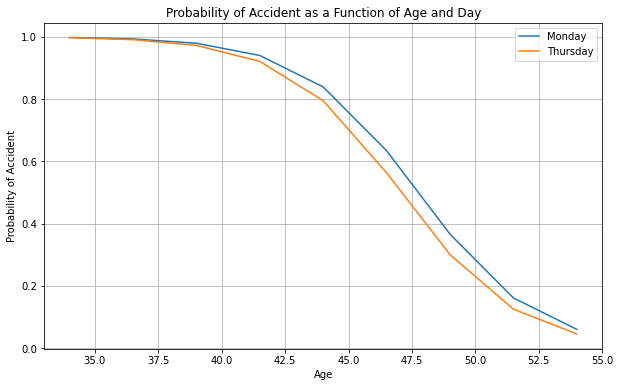

In [53]:
all_probs = {}

for day_name in New_X_train.columns:
    if day_name == 'days_c_Monday':
        probs = [get_probs(age, day_name) for age in ages]
        all_probs[day_name] = probs
    if day_name == 'days_c_Thursday':
        probs = [get_probs(age, day_name) for age in ages]
        all_probs[day_name] = probs

plt.figure(figsize=(10, 6))
plt.plot(ages, all_probs['days_c_Monday'], label='Monday')
plt.plot(ages, all_probs['days_c_Thursday'], label='Thursday')
plt.ylabel('Probability of Accident')
plt.xlabel('Age')
plt.title('Probability of Accident as a Function of Age and Day')
plt.legend()
plt.grid(True)
plt.show()

<div dir="rtl">

#### אנו רואים שביום שני באופן כללי ניתן לומר שהסיכוי גדול יותר לתאונה כמעט לכל גיל (מאשר ביום חמישי) וככל שהגיל עולה הסיכוי לתאונה קטן

____________________________________________

<div dir="rtl">

#### 9. בהמשך לסעיף 8 יש לחשב את הodd ratio  כפונקציה של המשתנה הרציף. נא להוציא גרף שמראה את התוצאה. יש להסביר את התוצאה שקיבלתם ולמה הגרף נראה כפי שהוא נראה. בנוסף יש לחשב את הlog odd ratio מה המשמעות שלו?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


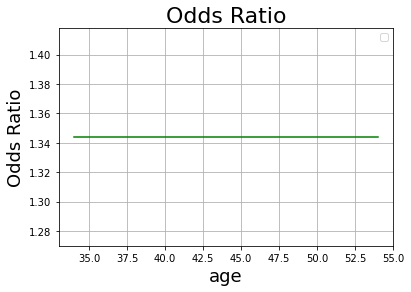

In [57]:
probs_df = pd.DataFrame.from_dict(all_probs)
odds_df = pd.DataFrame({'Mon_odds' : []})
odds_df[['Mon_odds']] = probs_df[['days_c_Monday']]/(1-probs_df[['days_c_Monday']])
odds_df[['Thu_odds']] = probs_df[['days_c_Thursday']]/(1-probs_df[['days_c_Thursday']])
odds_ratio = np.array(odds_df.Mon_odds/odds_df.Thu_odds).round(4)

plt.figure()
plt.plot(ages, odds_ratio, color = 'green')
plt.xlabel('age', fontsize = 18)
plt.ylabel('Odds Ratio',  fontsize = 18)
plt.grid()
plt.title('Odds Ratio',  fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl">

#### הבעצם odds ratio הוא מדד שאומר לי פי כמה הסיכוי למקרה א גדול מהסיכוי למקרה ב (אצלנו פי כמה הסיכוי לתאונה בשני גדול מהסיכוי בחמישי) ובעצם יוצר חוסר תלות במשתנים האחרים ולכן תוצאת האודס רטיו לא השתנתה לאורך ציר ה-X(בגילאים שונים)

In [59]:
np.log(odds_ratio[0])

2.9557583457088155e-01

<div dir="rtl">

#### הלוג אודס רטיו מחזיר אותנו אל המקדם של המשתנה עליו עשינו את האודס רטיו אצלנו יום שני.

--------------------

<div dir="rtl">

#### 10. נא להציג את הconfusion matrix
####  מהו הערך סף המקסימלי כך שה-sensitivity יהיה לפחות 0.8? יש לעשות זאת עבור הtest set.

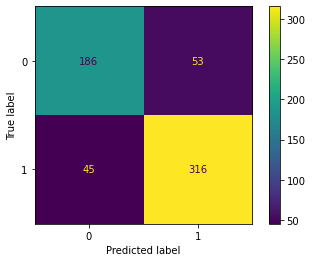

In [63]:
X_test_1 = pd.get_dummies(X_test, drop_first=True, dtype=float)
X_test_1['const'] = 1.0
X_test_1=X_test_1[New_X_train.columns]
X_test_1['pred_prob'] = results.predict(X_test_1[['const', 'age', 'expirience', 'days_c_Monday', 'days_c_Thursday',
       'days_c_Tuesday', 'days_c_Wednesday', 'toys_c_electric_toys',
       'toys_c_puzzels']])

X_test_1['classification'] = X_test_1['pred_prob'].apply(lambda x: 1 if x > 0.5 else 0)
cm = confusion_matrix(y_test, X_test_1['classification'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()
plt.show()

#### sensitivity:

In [65]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.8753462603878116

In [66]:
thresholds = np.linspace(1,0,100)
for i in thresholds:
    X_test_1['classification'] = X_test_1['pred_prob'].apply(lambda x: 1 if x > i else 0)
    cm = confusion_matrix(y_test,X_test_1['classification'])
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    if sensitivity >= 0.8:
        print ('The threshold value is: '+str(i))
        break

The threshold value is: 0.6767676767676767


----------------------------------------

<div dir="rtl">

#### 11. יש להוציא ROC curve עבור המודל הסופי ולחשב את הAUC.

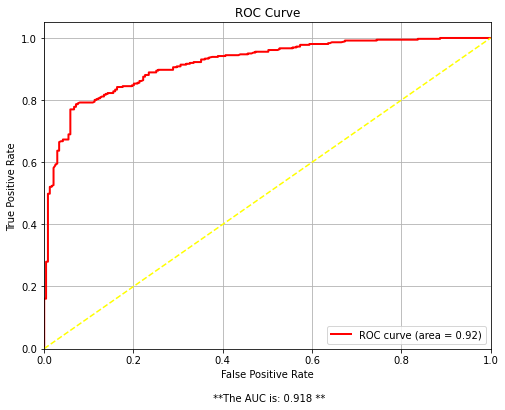

In [69]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,X_test_1['pred_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'+'\n\n **The AUC is: '+str(roc_auc.round(3))+' **' )
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


----------------------------------------

<div dir="rtl">

#### 12. יש להוציא עוד שני ROC curves. פעם אחת כאשר אתם מוציאים משתנה רציף אחד ופעם שנייה כאשר אתם מוציאים משתנה קטגוריאלי מהמודל. יש להכניס את כל הROC curves כולל את העקומה מסעיף 11 ולשים בגרף אחד. יש להשוות בין שלוש ה-AUC. מה קרה לAUC אחרי שהוצאתם את המשתנה הרציף ואחרי שהוצאתם את המשתנה הקטוגוריאלי? מי הושפע יותר ? מה זה אומר לדעתכם?

In [72]:
X_test_1.columns

Index(['const', 'age', 'expirience', 'days_c_Monday', 'days_c_Thursday',
       'days_c_Tuesday', 'days_c_Wednesday', 'toys_c_electric_toys',
       'toys_c_puzzels', 'pred_prob', 'classification'],
      dtype='object')

In [73]:
#Roc_num_2 (whituot - 'days_c_Monday'):
X_2 = X_test_1[['const', 'age', 'expirience', 'days_c_Thursday',
       'days_c_Tuesday', 'days_c_Wednesday', 'toys_c_electric_toys',
       'toys_c_puzzels']]

logit_model2=sm.Logit(y_test,X_2)
results_2=logit_model2.fit()
pred_prob2 = results_2.predict(X_2)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, pred_prob2)
roc_auc_2 = auc(fpr_2, tpr_2)

Optimization terminated successfully.
         Current function value: 0.346859
         Iterations 7


In [74]:
#Roc_num_3 (whituot - 'expirience'):
X_3 = X_test_1[['const', 'age', 'days_c_Monday', 'days_c_Thursday',
       'days_c_Tuesday', 'days_c_Wednesday', 'toys_c_electric_toys',
       'toys_c_puzzels']]

logit_model3=sm.Logit(y_test,X_3)
results_3=logit_model3.fit()
pred_prob3 = results_3.predict(X_3)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, pred_prob3)
roc_auc_3 = auc(fpr_3, tpr_3)

Optimization terminated successfully.
         Current function value: 0.619549
         Iterations 5


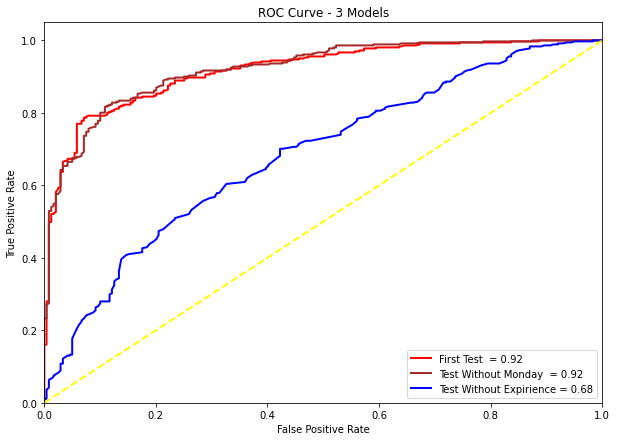

In [75]:
# Plot:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='red', lw=2, label=f'First Test  = {roc_auc:.2f}')
plt.plot(fpr_2, tpr_2, color='brown', lw=2, label=f'Test Without Monday  = {roc_auc_2:.2f}')
plt.plot(fpr_3, tpr_3, color='blue', lw=2, label=f'Test Without Expirience = {roc_auc_3:.2f}')
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - 3 Models')
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

####  מה קרה לAUC אחרי שהוצאתם את המשתנה הרציף ואחרי שהוצאתם את המשתנה הקטוגוריאלי?
#### - המשתנה הרציף שהורדנו הוא הניסיון ורואים איך הניסיון מאוד משפיע על הטסט, ואחרי שהורדנו את המשתנה "יום שני" (הקטגורי) ניתן לראות את הפער, הקטגורי כמעט ולא משפיע לעומת הרציף שבעל השפעה יותר גדולה.

<div dir="rtl">

#### מי הושפע יותר ?
#### - ה-AUC השלישי הושפע הכי הרבה כמו שאמרנו, דבר הגיוני כי ניסיון הוא גורם חשוב במניעת תאונות עבודה.

<div dir="rtl">

#### מה זה אומר לדעתכם?
#### - כפי שנראה הגרף, המשתנה של הניסיון טוב לנו, הוא מגדיל את השטח מתחת לגרף ולכן אם צריך לוותר על משתנה כדאי להוריד מי שיוריד לי הכי מעט מהשטח מתחת לגרף וזה כנראה יהיה משתנה שפחות קשור למשתנה המוסבר.





--------------------------------------------------
-------------------------------------------





<div dir="rtl">
    
# חלק שני

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
import seaborn as sns

In [82]:
data1 = pkl.load(open('drunk_driver_grpoup_28.pkl', 'rb'))
data1.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver
0,27.476488,1.0,18,17,2,male,night,39
1,19.200994,1.0,27,17,4,female,evening,15
2,3.430597,1.0,32,18,2,female,evening,2
3,16.821334,1.0,32,18,1,male,night,45
4,28.000745,1.0,31,17,4,male,morning,47


<div dir="rtl">
    
### 1. נא להוציא הסטוגרמה של מספר הנהגים השיכורים, מה ההתרשמות הכללית?

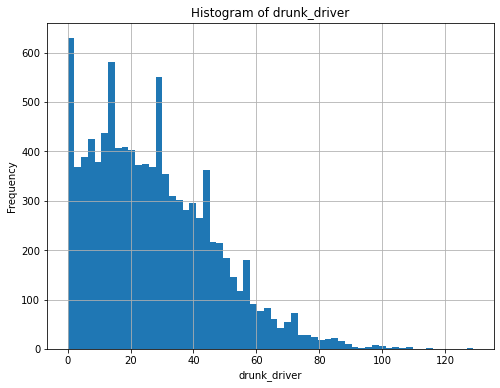

In [84]:
plt.figure(figsize=(8, 6))
data1.drunk_driver.hist(bins=60)
plt.title('Histogram of drunk_driver')
plt.xlabel('drunk_driver')
plt.ylabel('Frequency')
plt.show()

<div dir="rtl">

####  ברוב הדרכים נעצרו בין 0 ל60 נהגים שיכורים

----------------------------------------

<div dir="rtl">

### 2. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו?

In [88]:
data = pd.get_dummies(data1)
data = pd.concat([data], axis=1)

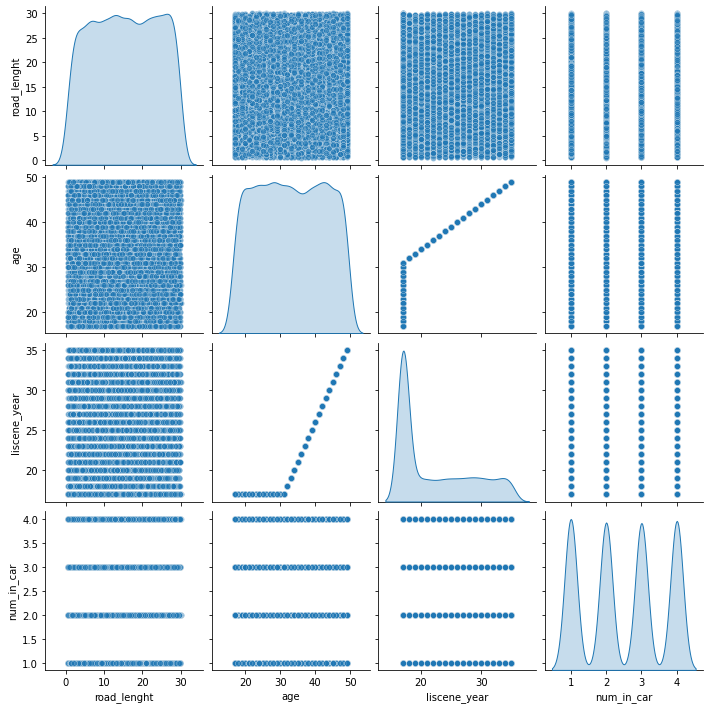

In [89]:
sns.pairplot(data[['road_lenght','age','liscene_year','num_in_car']], markers=["o","s"],diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()

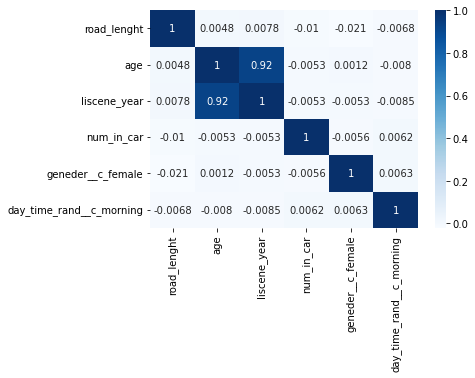

In [90]:
sns.heatmap(data[['road_lenght','age','liscene_year','num_in_car','geneder__c_female','day_time_rand__c_morning']].corr(),cmap='Blues',annot = True)
plt.show()


<div dir="rtl">

####  מהפיזור ומהקורלציה ניתן ללמוד שהקשר הכי חזק הוא בין הגיל לשנות הנהיגה (כמה שנים יש לאותם אנשים רשיון) כאשר מקדם המתאם ביניהם הוא: 0.92 מראה על קשר חיובי חזק

----------------------------------------

<div dir="rtl">

### 3.עבור משתנה קטגוריאלי אחד יש להציג bar chart של מספר נהגים שיכורים לק"מ בודד (בממוצע). איזו קבוצה הכי מועדת לפורענות?

In [94]:
data1['drunk_by_KM']= data1['drunk_driver']/data1['road_lenght']

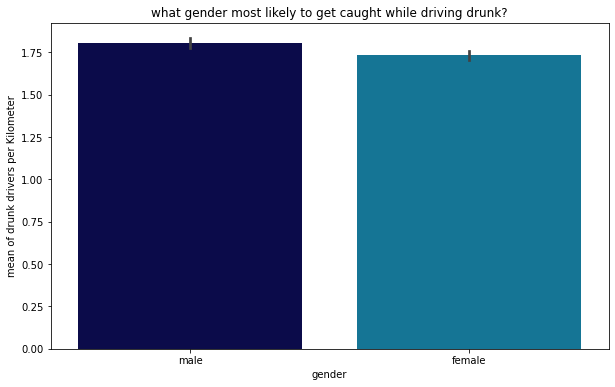

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x="geneder__c", y="drunk_by_KM",  data=data1 , palette='ocean')
plt.xlabel("gender")
plt.ylabel("mean of drunk drivers per Kilometer")
plt.title("what gender most likely to get caught while driving drunk?")
plt.show()

<div dir="rtl">

####  בנסיון לראות איזו קבוצה מועדת יותר לפורענות, נשים או גברים, חילקנו את מספר השיכורים לדרך נתונה באורך הדרך (כדי להגיע לק"מ בודד) ועשינו על משתנה זה ממוצע.
####  מהגרף נראה כי גברים מועדים לנהיגה בשכרות יותר מנשים אך מפתיע כי הפער קטן.

----------------------------------------

<div dir="rtl">

### 4. רגרסיה ליניארית: נסו לחזות בעזרת רגרסיה ליניארית את מספר השיכורים בקטע כביש.

In [99]:
data.columns

Index(['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car',
       'drunk_driver', 'geneder__c_female', 'geneder__c_male',
       'day_time_rand__c_afternoon', 'day_time_rand__c_evening',
       'day_time_rand__c_morning', 'day_time_rand__c_night'],
      dtype='object')

In [124]:
Regression_model = sm.OLS(data[['drunk_driver']], data[['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car', 'geneder__c_female', 'geneder__c_male',
       'day_time_rand__c_afternoon', 'day_time_rand__c_evening',
       'day_time_rand__c_morning', 'day_time_rand__c_night']])
results = Regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     3125.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:33:33   Log-Likelihood:                -37453.
No. Observations:               10000   AIC:                         7.492e+04
Df Residuals:                    9991   BIC:                         7.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
road_lenght         

In [126]:
#תחזית לינארית
data['Linear_forecast'] = results.predict()
data[['Linear_forecast']]

,Linear_forecast
0,44.554572
1,24.024132
2,2.770565
3,33.933958
4,45.746115
...,...
9995,24.875734
9996,46.299944
9997,38.193327
9998,23.877023


----------------------------------------

<div dir="rtl">
    
### 5. נא לבדוק את הנחות המודל - אילו הנחות הופרו?

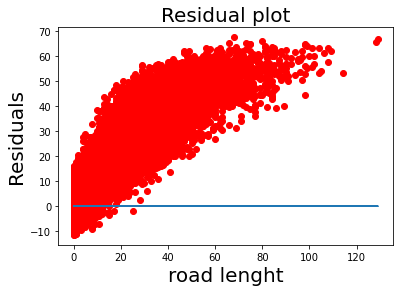

In [137]:
# חישוב הפרשי החסרונות
residuals = data['drunk_driver'] - data['Linear_forecast']

# יצירת תרשים הפרשי החסרונות
plt.figure()
plt.scatter(data['drunk_driver'], data['Linear_forecast'], color='r')
plt.plot(data['drunk_driver'], np.zeros(data['drunk_driver'].shape[0]))
plt.xlabel('road lenght', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residual plot', fontsize=20)
plt.show()

<div dir="rtl">

####  הפיזור לא נשאר שווה לאורך ציר האיקס ולכן הנחת המודל אינה מתקיימת

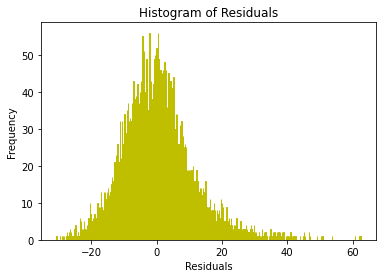

In [140]:
import scipy.stats as stats

# Histogram of residuals
plt.hist(residuals, bins=1000, edgecolor='y')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


----------------------------------------

<div dir="rtl">
    
### 6. יש כעת לעשות רגרסיה פואסונית -נא להוציא משתנים לא מובהקים

In [146]:
#עדכון הדאטה בלי העמודות של סעיפים קודמים
data=data[['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car',
       'drunk_driver', 'geneder__c_female', 'geneder__c_male',
       'day_time_rand__c_afternoon', 'day_time_rand__c_evening',
       'day_time_rand__c_morning', 'day_time_rand__c_night']]

In [150]:

model_poisson2 = sm.GLM(data['drunk_driver'],data[['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car',
       'geneder__c_female', 'geneder__c_male',
       'day_time_rand__c_afternoon', 'day_time_rand__c_evening',
       'day_time_rand__c_morning', 'day_time_rand__c_night']] , family=sm.families.Poisson())  # Poisson regression model
results_poisson2 = model_poisson2.fit()
print(results_poisson2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44477.
Date:                Thu, 04 Apr 2024   Deviance:                       41431.
Time:                        00:38:10   Pearson chi2:                 3.97e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
road_lenght         

----------------------------------------

<div dir="rtl">

### 7. האם רגריסה פואוסנית מתאימה כאן? נמק.י יש לבדוק -4 דרכים שונות

<div dir="rtl"> 

### (א) התוחלת שווה לשונות

In [155]:
data['predictions'] = results_poisson2.fittedvalues

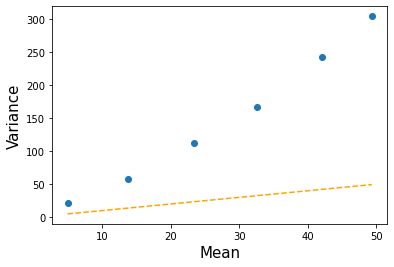

In [157]:
lams = np.linspace(0,100, 20)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = data.loc[(data['road_lenght']>lb)& (data['road_lenght']<ub), 'drunk_driver'].shape
    var = data.loc[(data['road_lenght']>lb)& (data['road_lenght']<ub), 'drunk_driver'].std()**2
    mean = data.loc[(data['road_lenght']>lb)& (data['road_lenght']<ub), 'drunk_driver'].mean()
    
    if shape[0] > 15:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

<div dir="rtl">

#### נראה שהשונות אינה שווה לתוחלת ולכן המבחן אינו מתקיים

ציר X - ממוצע תקריות נהיגה בשכרות

ציר Y - שונות

הקו המקווקו מייצג את הקו שבו הממוצע שווה לשונות
אפשר לראות שככל שהממוצע עולה השונות נוטה לעלות גם כן


<div dir="rtl"> 

### (ב) שאריות בטווח 2 סטיות תקן

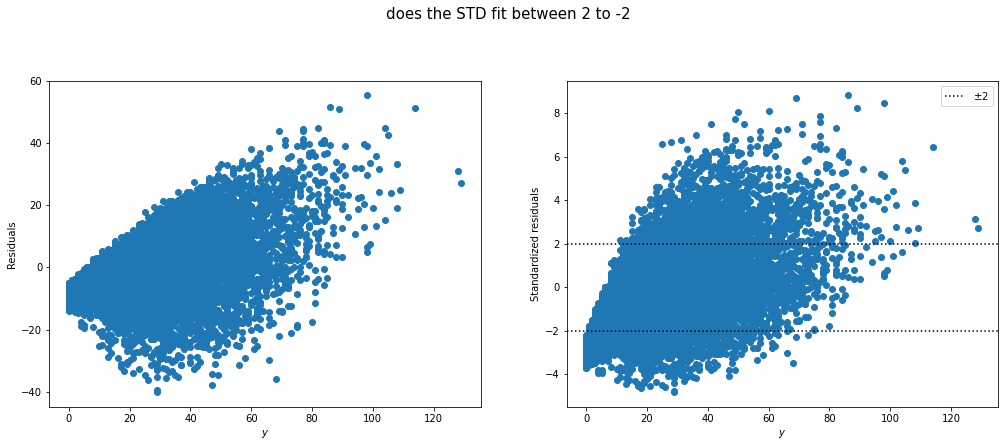

In [161]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(data['drunk_driver'], results_poisson2.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(data['drunk_driver'], results_poisson2.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.suptitle('does the STD fit between 2 to -2',fontsize = 15, x=0.5, y=1.05)
plt.show()

<div dir="rtl">
    
#### לפי הגרף של השאריות אכן נראה שהטווח גדול מ2 סטיות תקן ולכן המבחן לא מתקיים

<div dir="rtl"> 

### (ג) אר קרוב ל1

In [165]:
results_poisson2.pearson_chi2
results_poisson2.df_resid

R = results_poisson2.pearson_chi2/results_poisson2.df_resid
print(R) 

3.974226837047324e+00


<div dir="rtl">
    
#### ניכר כי אר רחוקה מ1 ולכן המבחן לא מתקיים

<div dir="rtl"> 

### (ד) P-value

In [169]:
from scipy.stats import chi2

data = results_poisson2.df_resid
p_value = 1 - chi2.cdf(results_poisson2.pearson_chi2, data)

print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


ערך קטן מצביע על כך שהנתונים אינם סבירים תחת השערת האפס - ולכן נדחה

<div dir="rtl">
    
#### שוב, פי-ווליו לא עומד במבחן ולכן התנאי לא מתקיים

----------------------------------------

<div dir="rtl">

### 8. אם בסעיף 7 התשובה הייתה לא, נא לעשות רגרסיה בינומית שלילית ולבדוק אם היא מתאימה כאן.
###  אם בסעיף 7 התשובה הייתה כן נא לחשב את הIRR של אחד המשתנים הרציפים ולהסביר מה המשמעות שלו במונחים של מספר נהגים שיכורים

<div dir="rtl">
    
#### כפי שראינו, בהנחת מודל הרגרסיה הפואסונית לא מתקיים אף אחד מהמבחנים ולכן נלך לרגרסיה בינומית שלילית:

<div dir="rtl">
    
#### נמצא את אלפא:

In [176]:
data = pd.get_dummies(data1)
data = pd.concat([data], axis=1)

In [178]:
y = data1['drunk_driver']
X = data[['road_lenght', 'intercept', 'age', 'liscene_year', 'num_in_car', 'geneder__c_male', 'day_time_rand__c_afternoon', 'day_time_rand__c_evening',
       'day_time_rand__c_night']]

In [180]:
import numpy as np
import pandas as pd
from statsmodels.discrete.discrete_model import NegativeBinomial

# Assuming X and y are your input data
# Check and handle data types and missing values
X = X.astype(float)  # Convert data types to float
y = y.astype(float)  # Convert data types to float
X.dropna(inplace=True)  # Drop rows with missing values
y.dropna(inplace=True)  # Drop rows with missing values

# Fit NegativeBinomial model
nb = NegativeBinomial(y, X.drop(columns=['road_lenght']), offset=np.log(X['road_lenght']))
result = nb.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 3.518163
         Iterations: 21
         Function evaluations: 28
         Gradient evaluations: 28
                     NegativeBinomial Regression Results                      
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:               NegativeBinomial   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                 0.03962
Time:                        00:39:14   Log-Likelihood:                -35182.
converged:                       True   LL-Null:                       -36633.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
interc

In [182]:
from statsmodels.discrete.discrete_model import NegativeBinomial

nb = NegativeBinomial(
    y,
    X.drop(columns=['road_lenght']).values,offset=np.log(X["road_lenght"])        )
    
result = nb.fit()
#print(result.summary())
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 3.518163
         Iterations: 21
         Function evaluations: 28
         Gradient evaluations: 28
0    0.088091
Name: alpha, dtype: float64


In [184]:
print(pd.DataFrame(result.params).loc['alpha',:])

0    0.088091
Name: alpha, dtype: float64


פרמטר הפיזור אלפא ברגרסיה בינומית שלילית שולט בשונות של המודל. זהו פרמטר מכריע לניתוח נתוני ספירה, במיוחד כאשר קיים פיזור יתר (שונות גדולה מהממוצע). ערך גדול יותר של אלפא מצביע על פיזור גדול יותר ומצביע על כך שמודל רגרסיה בינומית שלילית עשוי להתאים יותר ממודל רגרסיה של Poisson עבור הנתונים הנתונים.

----------------------------------------

<div dir="rtl">

### 9. predictions: יש להוציא גרף תלת מימדי של תחזית מספר הנהגים הממוצע כפונקציה של שני משתנים רציפים שנכנסו למודל. עבור שאר המשתנים הקטגוריאלים נזין את הערך 0. יש לפלוט באותו גרף שני מישורים כאשר אחד מדווח על האורך כביש של 1 ק"מ ואילו השני מדווח על כביש באורך 5 ק"מ. האם יש הבדל ניכר בין המישורים שקיבלתם, האם ניתן להסביר מבחינה הגיונית את התוצאה?

In [188]:
#pd.options.mode.copy_on_write = True
X_copy=X[[ 'intercept', 'age', 'liscene_year',
       'geneder__c_male', 'day_time_rand__c_afternoon',
       'day_time_rand__c_evening', 'day_time_rand__c_night']]
X_copy[['geneder__c_male', 'day_time_rand__c_afternoon',
       'day_time_rand__c_evening', 'day_time_rand__c_night']]=0

/tmp/ipykernel_4822/13813468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy[['geneder__c_male', 'day_time_rand__c_afternoon',


In [190]:
def surface_eq(age, liscene_year):
    return np.exp(0.0266 + 0.0200*age + 0.1064*liscene_year)

In [192]:
X1,Y1 = np.meshgrid(X_copy['age'], X_copy['liscene_year'])
Z1 = surface_eq(X1,Y1)*1
X2, Y2 = np.meshgrid(X_copy['age'], X_copy['liscene_year'])
Z2 = surface_eq(X2,Y2)*5

In [194]:
import numpy as np

# Assuming X_copy['age'] and X_copy['liscene_year'] are your data
# You can reduce the number of points for the meshgrid
num_points = 100  # Adjust this value as needed

# Create meshgrid arrays with reduced number of points
age_values = np.linspace(X_copy['age'].min(), X_copy['age'].max(), num_points)
license_year_values = np.linspace(X_copy['liscene_year'].min(), X_copy['liscene_year'].max(), num_points)
X1, Y1 = np.meshgrid(age_values, license_year_values)

# Compute the surface equation using the reduced meshgrid
Z1 = surface_eq(X1, Y1) * 1  # Adjust the multiplier as needed

# Repeat for another set of meshgrid with reduced points
X2, Y2 = np.meshgrid(age_values, license_year_values)
Z2 = surface_eq(X2, Y2) * 5  # Adjust the multiplier as needed


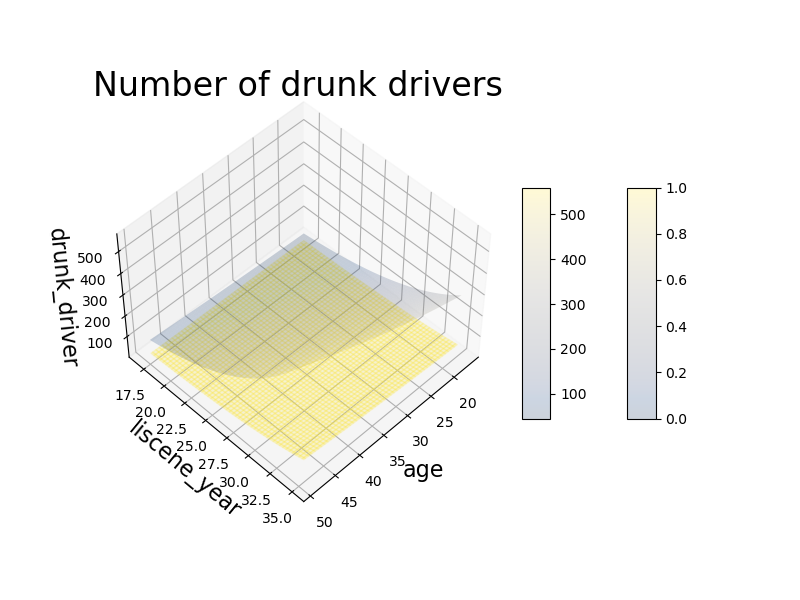

In [196]:
%matplotlib widget

fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')

surf1 = ax.plot_surface(X1, Y1, Z1, cmap = plt.cm.cividis, alpha = 0.2,facecolors=plt.cm.cividis(Z1))
surf2 = ax.plot_surface(X2, Y2, Z2, cmap = plt.cm.cividis, alpha = 0.2)

# Set axes label
ax.set_xlabel('age',fontsize = 16)
ax.set_ylabel('liscene_year',fontsize = 16)
ax.set_zlabel('drunk_driver',fontsize = 16)
plt.title('Number of drunk drivers' ,fontsize = 24)
fig.colorbar(surf1, shrink=0.5, aspect=8)
fig.colorbar(surf2, shrink=0.5, aspect=8)
ax.view_init(elev=50., azim=45)
plt.show()

### אנו רואים שככל שהגיל עולה הסיכוי לנהוג בשכרות עולה, ובהתאמה ככל ששנות הניסיון עולות כך גם הסיכוי לנהוג בשיכרות עולה
### אפשר להסביר זאת מכיוון שעם הגיל והניסיון נצבר ביטחון שלפעמים יכול להטעות
### בנוסף אנו רואים  שכאשר הכבישים ארוכים יותר הסיכוי לנהוג בשכרות נמוך יותר מאשר כבישים קצרים יותר
### זאת אפשר להסביר מכיוון שהנהג יאפשר לעצמו לנהוג שיכור כאשר המרחק מהיעד שלו קרוב

---------------------
------------------